# Task 1

In [1]:
from task1 import approx_lin_func, approx_nonlin_func, plot_func_over_data

### 1. First part
Approximate linear function in dataset `linear_function_data.txt`

In [2]:
linear_data_path = "../data/linear_function_data.txt"
A, residuals, rank, singvals = approx_lin_func(linear_data_path)

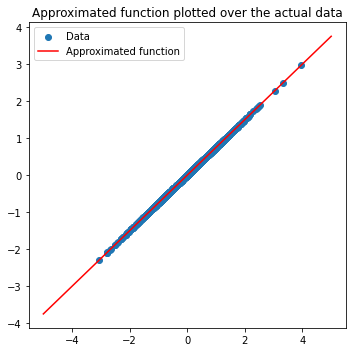

In [3]:
# plot approximated function over the linear data
plot_func_over_data(lstsqr_sol=A, data=linear_data_path, linear=True)

The function computed through least squares approximates well this data.

### 2. Second part
Approximate non-linear function in dataset `nonlinear_function_data.txt`

In [4]:
nonlinear_data_path = "../data/nonlinear_function_data.txt"
C, residuals, rank, singvals, centers, eps = approx_nonlin_func(nonlinear_data_path)

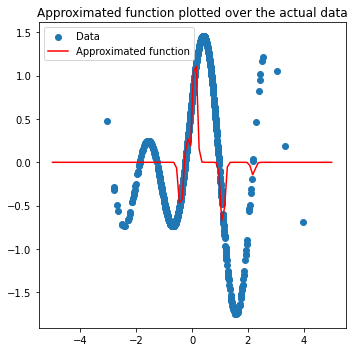

In [5]:
# plot approximated function over the linear data
plot_func_over_data(lstsqr_sol=C, data=nonlinear_data_path, linear=False, centers=centers, eps=eps)
